# Age of People in Congress

Downloads libraries and data and creates dataframe

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
congress = pd.read_csv('congress-terms.csv', parse_dates = ['termstart'])
congress

,congress,chamber,bioguide,firstname,middlename,lastname,suffix,birthday,state,party,incumbent,termstart,age
0,80,house,M000112,Joseph,Jefferson,Mansfield,NaN,1861-02-09,TX,D,Yes,1947-01-03,85.9
1,80,house,D000448,Robert,Lee,Doughton,NaN,1863-11-07,NC,D,Yes,1947-01-03,83.2
2,80,house,S000001,Adolph,Joachim,Sabath,NaN,1866-04-04,IL,D,Yes,1947-01-03,80.7
3,80,house,E000023,Charles,Aubrey,Eaton,NaN,1868-03-29,NJ,R,Yes,1947-01-03,78.8
4,80,house,L000296,William,NaN,Lewis,NaN,1868-09-22,KY,R,No,1947-01-03,78.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18630,113,senate,B000243,Max,S.,Baucus,NaN,1937-12-10,MT,D,Yes,2013-01-03,75.1
18631,113,senate,C001099,William,NaN,Cowan,NaN,1965-04-03,MA,D,No,2013-01-03,47.8
18632,113,senate,C001100,Jeffrey,Scott,Chiesa,NaN,1961-06-21,NJ,R,No,2013-01-03,51.5
18633,113,senate,K000148,John,Forbes,Kerry,NaN,1939-12-10,MA,D,Yes,2013-01-03,73.1


Creates new column that contains only the year of each term start

In [16]:
congress.year_term_start = [d.year for d in congress.termstart]

## Which party elects older politicians?

Creates a dataframe that contains only Democrats 

In [5]:
dem = pd.DataFrame(congress.loc[congress.party == 'D'])
dem

,congress,chamber,bioguide,firstname,middlename,lastname,suffix,birthday,state,party,incumbent,termstart,age,year_term_start
0,80,house,M000112,Joseph,Jefferson,Mansfield,NaN,1861-02-09,TX,D,Yes,1947-01-03,85.9,1947
1,80,house,D000448,Robert,Lee,Doughton,NaN,1863-11-07,NC,D,Yes,1947-01-03,83.2,1947
2,80,house,S000001,Adolph,Joachim,Sabath,NaN,1866-04-04,IL,D,Yes,1947-01-03,80.7,1947
7,80,house,B000565,Sol,NaN,Bloom,NaN,1870-03-09,NY,D,Yes,1947-01-03,76.8,1947
10,80,house,B000545,Schuyler,Otis,Bland,NaN,1872-05-04,VA,D,Yes,1947-01-03,74.7,1947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18629,113,senate,M001169,Christopher,S.,Murphy,NaN,1973-08-03,CT,D,Yes,2013-01-03,39.4,2013
18630,113,senate,B000243,Max,S.,Baucus,NaN,1937-12-10,MT,D,Yes,2013-01-03,75.1,2013
18631,113,senate,C001099,William,NaN,Cowan,NaN,1965-04-03,MA,D,No,2013-01-03,47.8,2013
18633,113,senate,K000148,John,Forbes,Kerry,NaN,1939-12-10,MA,D,Yes,2013-01-03,73.1,2013


Creates a dataframe containing only Republicans

In [6]:
rep = pd.DataFrame(congress.loc[congress.party == 'R'])
rep

,congress,chamber,bioguide,firstname,middlename,lastname,suffix,birthday,state,party,incumbent,termstart,age,year_term_start
3,80,house,E000023,Charles,Aubrey,Eaton,NaN,1868-03-29,NJ,R,Yes,1947-01-03,78.8,1947
4,80,house,L000296,William,NaN,Lewis,NaN,1868-09-22,KY,R,No,1947-01-03,78.3,1947
5,80,house,G000017,James,A.,Gallagher,NaN,1869-01-16,PA,R,No,1947-01-03,78.0,1947
6,80,house,W000265,Richard,Joseph,Welch,NaN,1869-02-13,CA,R,Yes,1947-01-03,77.9,1947
8,80,house,H000943,Merlin,NaN,Hull,NaN,1870-12-18,WI,R,Yes,1947-01-03,76.0,1947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18622,113,senate,A000368,Kelly,NaN,Ayotte,NaN,1968-06-27,NH,R,Yes,2013-01-03,44.5,2013
18624,113,senate,C001098,Ted,NaN,Cruz,NaN,1970-12-22,TX,R,No,2013-01-03,42.0,2013
18625,113,senate,R000595,Marco,NaN,Rubio,NaN,1971-05-28,FL,R,Yes,2013-01-03,41.6,2013
18626,113,senate,L000577,Mike,NaN,Lee,NaN,1971-06-04,UT,R,Yes,2013-01-03,41.6,2013


Creates a histogram comparing the number of politicians elected per party at each age

/Applications/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


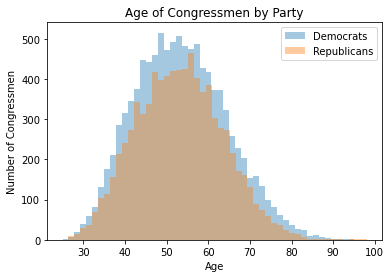

In [7]:
# is this even a good graph to use
# like can I actually draw any conclusions from this

sns.distplot(a = dem.age, label = 'Democrats', kde=False)
sns.distplot(a = rep.age, label = 'Republicans', kde=False)

plt.title('Age of Congressmen by Party')
plt.xlabel('Age')
plt.ylabel('Number of Congressmen')
plt.legend()
plt.show()

#### Results: 
Democrats and Republicans tend to follow the same trends for the age of their politicians - while Republicans skew slightly older than Democrats, both parties elect politicians of about the same age at very similar rates

Overall, neither party tends to elect more of a certain age group - the only definitive data is that there are more elected Democrats than Republicans

## Are politicians getting older or younger?

Creates a line plot showing the average age of congressmen elected each year.

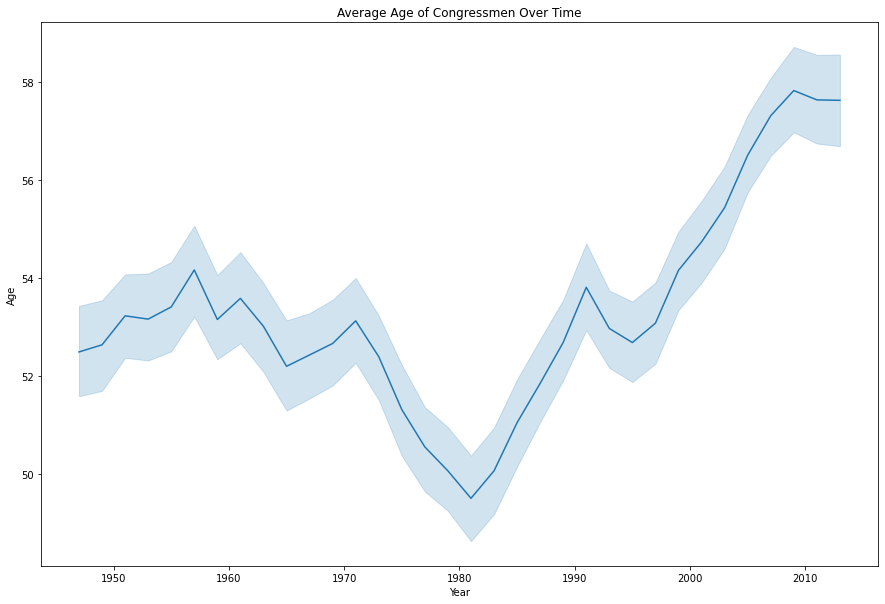

In [15]:
plt.figure(figsize = (15,10))
plt.title('Average Age of Congressmen Over Time')
plt.xlabel('Year')
plt.ylabel('Age')
# y-axis range: 0-58

sns.lineplot(x = congress.year_term_start, y = congress.age) 
# sns.lineplot(data = dem['age'], label = 'Democrats')
# sns.lineplot(data = rep['age'], label = 'Republicans')

plt.show() 

#### Results:
Over time, the average age of congressmen has increased from (find age) in 1947 to (find age) in 2013.